In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("F:\Datasets\house_price.csv")

In [60]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [61]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [63]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [64]:
df.shape

(13200, 7)

In [65]:
df.duplicated().sum()

1049

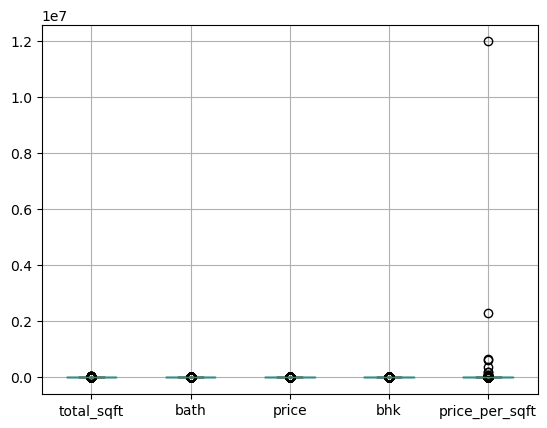

In [66]:
df.boxplot()

plt.show()

In [67]:
plt.figure(figsize=(8, 6))
df[['price_per_sqft']].boxplot()

<Axes: >

In [68]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

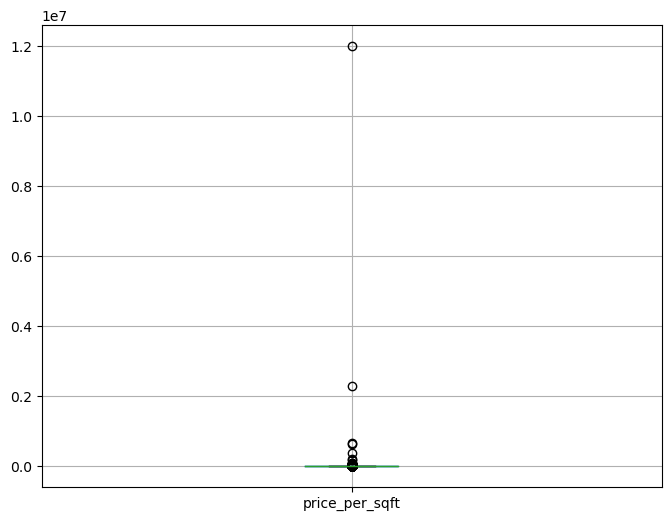

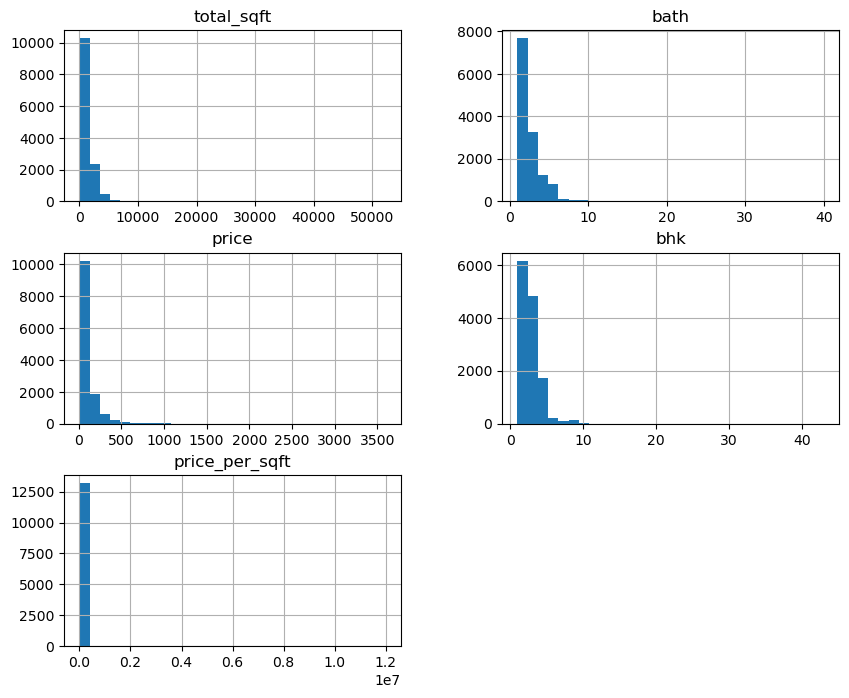

In [69]:
df.hist(bins=30,figsize=(10,8))
plt.show()

# Outliers using(Mean and Standard deviation)

MEAN =  7920.336742424242
STD =  106727.16032810845
DataFrame After Removing Outliers:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.

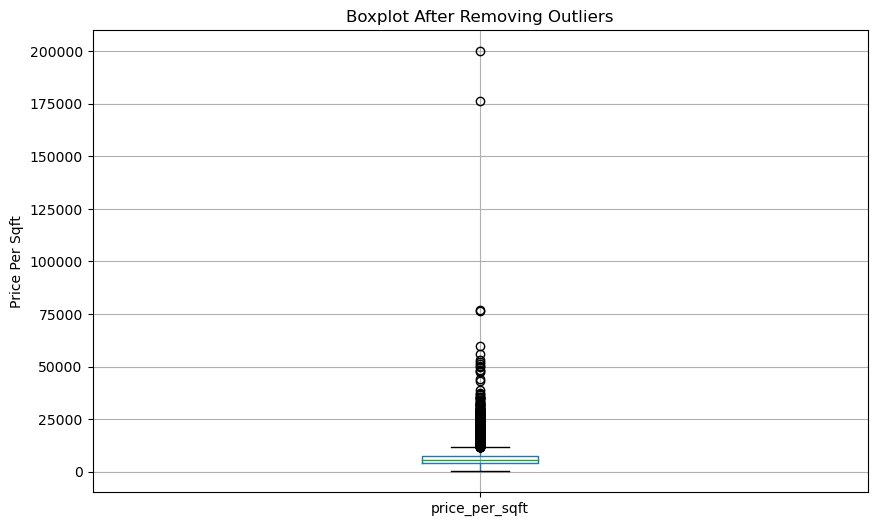

In [70]:
mean1 = df['price_per_sqft'].mean()
std_div1 = df['price_per_sqft'].std()

print("MEAN = ",mean1)
print("STD = ",std_div1)

threshold = 3

lower_bound = mean1 - (threshold*std_div1)
upper_bound = mean1 + (threshold*std_div1)

df['outliers1'] = (df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)

mean_non_outliers = df.loc[~df['outliers1'], 'price_per_sqft'].mean()

df['price_per_sqft'] = np.where(df['outliers1'], mean_non_outliers, df['price_per_sqft'])

df_cleaned = df[~df['outliers1']]

print("DataFrame After Removing Outliers:")
print(df_cleaned)

plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column=['price_per_sqft'])
plt.title('Boxplot After Removing Outliers')
plt.ylabel('Price Per Sqft')
plt.show()



# Outliers using(Percentile method)


2549.0
23333.0


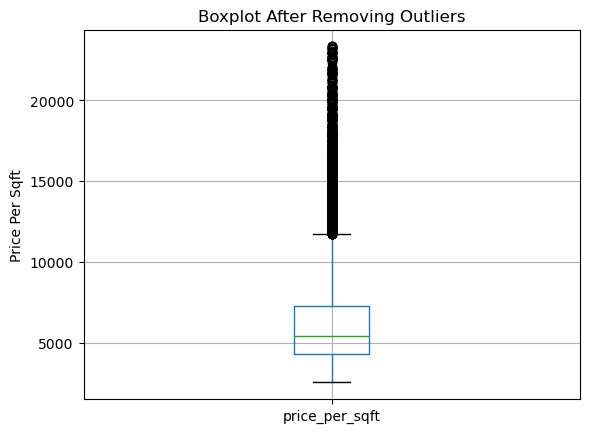

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  outliers1  
0              3699.0      False  
1    

In [71]:
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

print(lower_percentile)
print(upper_percentile)

df['outliers2'] = ((df['price_per_sqft']<lower_percentile) | (df['price_per_sqft']>upper_percentile))

mean_perc = df.loc[~df['outliers2'], 'price_per_sqft'].mean()


df['price_per_sqft'] = np.where(df['outliers2'], mean_perc, df['price_per_sqft'])


df_cleaned1 = df[~df['outliers2']]


df_cleaned1.boxplot(column=['price_per_sqft'])
plt.title('Boxplot After Removing Outliers')
plt.ylabel('Price Per Sqft')
plt.show()

print(df_cleaned)

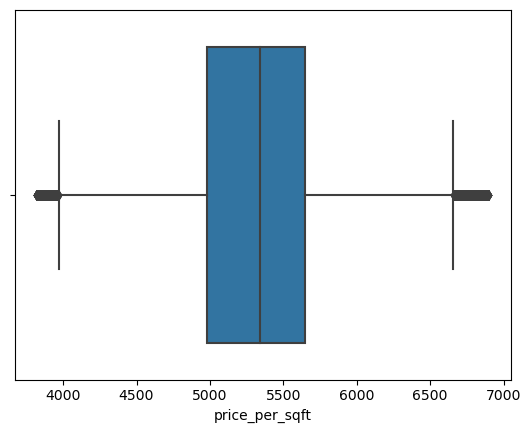

In [49]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

# Outliers using(IQR method)

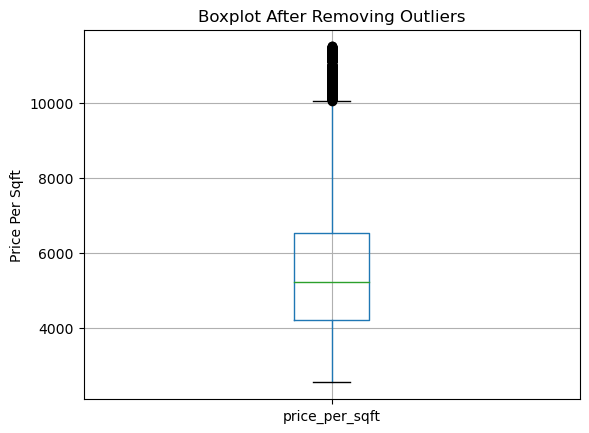

In [72]:
Q3 = df['price_per_sqft'].quantile(.75)
Q1 = df['price_per_sqft'].quantile(.25)

IQR = Q3-Q1

lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

df['outliers3'] = (df['price_per_sqft']<lower_bound1) | (df['price_per_sqft']>upper_bound1)


mean_ = df.loc[~df['outliers3'], 'price_per_sqft'].mean()

df['price_per_sqft'] = np.where(df['outliers3'], mean_non_outliers, df['price_per_sqft'])

df_cleaned1 = df[~df['outliers3']]

df_cleaned1.boxplot(column=['price_per_sqft'])
plt.title('Boxplot After Removing Outliers')
plt.ylabel('Price Per Sqft')
plt.show()

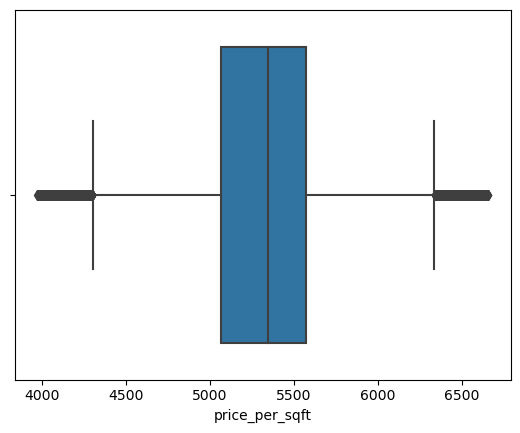

In [51]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

# Outliers using(Z Score method)

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [78]:
from scipy import stats
from scipy.stats import skew, kurtosis, boxcox

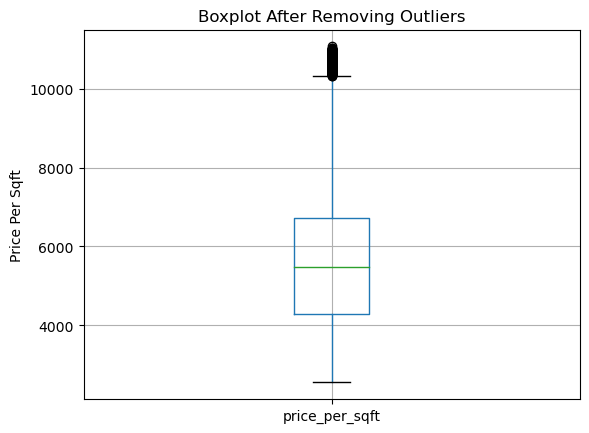

In [73]:
df['z_score'] = stats.zscore(df['price_per_sqft'])

df['outliers4'] = (abs(df['z_score'])>3)

mean_zc = df.loc[~df['outliers4'], 'price_per_sqft'].mean()

df['price_per_sqft'] = np.where(df['outliers4'], mean_zc, df['price_per_sqft'])

df_cleaned1 = df[~df['outliers4']]

df_cleaned1.boxplot(column=['price_per_sqft'])
plt.title('Boxplot After Removing Outliers')
plt.ylabel('Price Per Sqft')
plt.show()

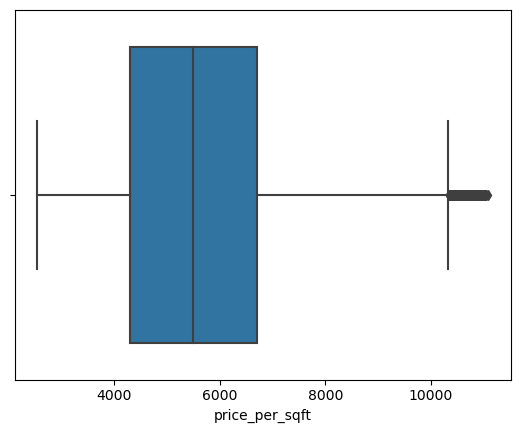

In [74]:
sns.boxplot(x=df['price_per_sqft'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df.boxplot(column=['price_per_sqft'])
plt.title('Original Data')

# Percentile Method
plt.subplot(2, 2, 2)
df.boxplot(column=['price_per_sqft_perc'])
plt.title('After Removing Outliers (Percentiles)')

# Z-score Method
plt.subplot(2, 2, 3)
df.boxplot(column=['price_per_sqft_zscore'])
plt.title('After Removing Outliers (Z-scores)')

# IQR Method
plt.subplot(2, 2, 4)
df.boxplot(column=['price_per_sqft_iqr'])
plt.title('After Removing Outliers (IQR)')

# Show the plots
plt.tight_layout()
plt.show()


# box plot work best to remove outliers for data

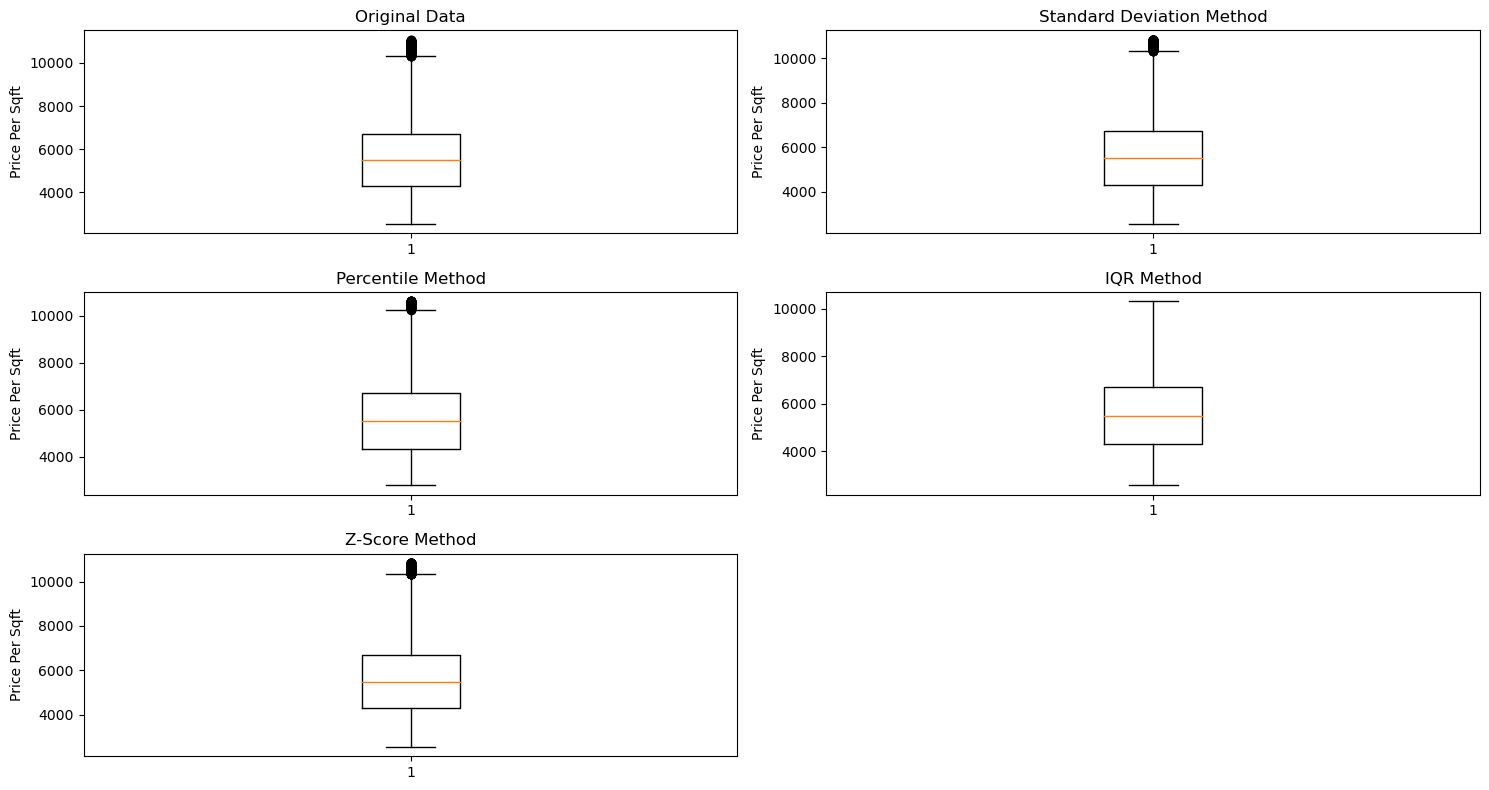

In [75]:
# Original data boxplot
plt.figure(figsize=(15, 8))
plt.subplot(3, 2, 1)
plt.boxplot(df['price_per_sqft'])
plt.title('Original Data')
plt.ylabel('Price Per Sqft')

# Standard Deviation Method
mean1 = df['price_per_sqft'].mean()
std_div1 = df['price_per_sqft'].std()
threshold = 3
lower_bound = mean1 - (threshold * std_div1)
upper_bound = mean1 + (threshold * std_div1)
df['outliers1'] = (df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)
mean_non_outliers = df.loc[~df['outliers1'], 'price_per_sqft'].mean()
df['price_per_sqft_std'] = np.where(df['outliers1'], mean_non_outliers, df['price_per_sqft'])

plt.subplot(3, 2, 2)
plt.boxplot(df['price_per_sqft_std'])
plt.title('Standard Deviation Method')
plt.ylabel('Price Per Sqft')

# Percentile Method
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)
df['outliers2'] = ((df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile))
mean_perc = df.loc[~df['outliers2'], 'price_per_sqft'].mean()
df['price_per_sqft_perc'] = np.where(df['outliers2'], mean_perc, df['price_per_sqft'])

plt.subplot(3, 2, 3)
plt.boxplot(df['price_per_sqft_perc'])
plt.title('Percentile Method')
plt.ylabel('Price Per Sqft')

# IQR Method
Q3 = df['price_per_sqft'].quantile(0.75)
Q1 = df['price_per_sqft'].quantile(0.25)
IQR = Q3 - Q1
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR
df['outliers3'] = (df['price_per_sqft'] < lower_bound1) | (df['price_per_sqft'] > upper_bound1)
mean_iqr = df.loc[~df['outliers3'], 'price_per_sqft'].mean()
df['price_per_sqft_iqr'] = np.where(df['outliers3'], mean_iqr, df['price_per_sqft'])

plt.subplot(3, 2, 4)
plt.boxplot(df['price_per_sqft_iqr'])
plt.title('IQR Method')
plt.ylabel('Price Per Sqft')

# 5. Z-Score Method
df['z_score'] = stats.zscore(df['price_per_sqft'])
df['outliers4'] = (abs(df['z_score']) > 3)
mean_zc = df.loc[~df['outliers4'], 'price_per_sqft'].mean()
df['price_per_sqft_z'] = np.where(df['outliers4'], mean_zc, df['price_per_sqft'])

plt.subplot(3, 2, 5)
plt.boxplot(df['price_per_sqft_z'])
plt.title('Z-Score Method')
plt.ylabel('Price Per Sqft')

plt.tight_layout()
plt.show()


#dff

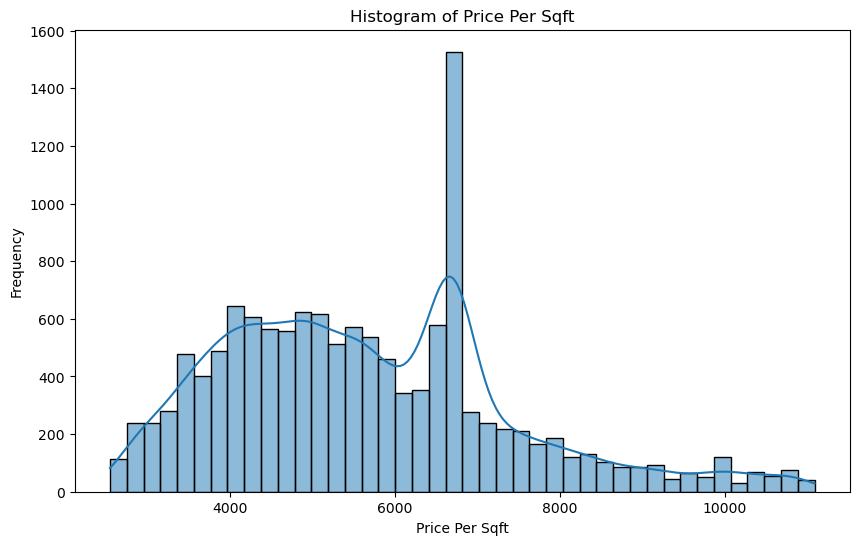

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

#dfdf


In [79]:
original_skewness = skew(df['price_per_sqft'])
original_kurtosis = kurtosis(df['price_per_sqft'])
print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

Original Skewness: 0.6701577826260174
Original Kurtosis: 0.28251633037426327


In [84]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

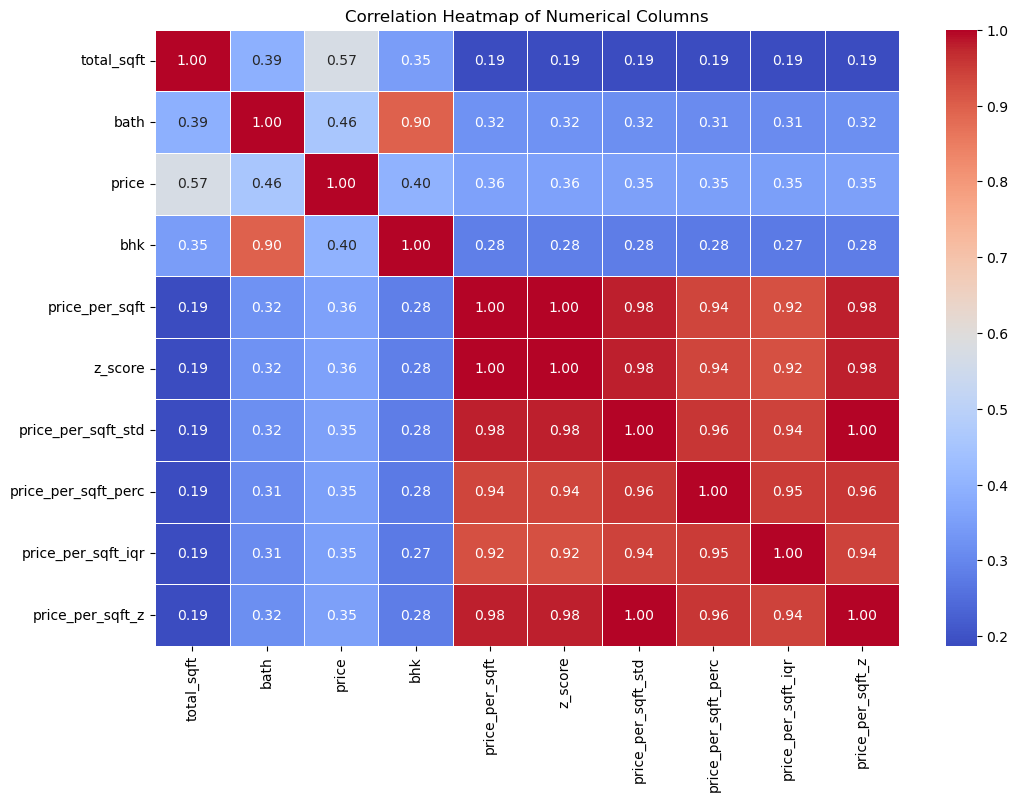

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

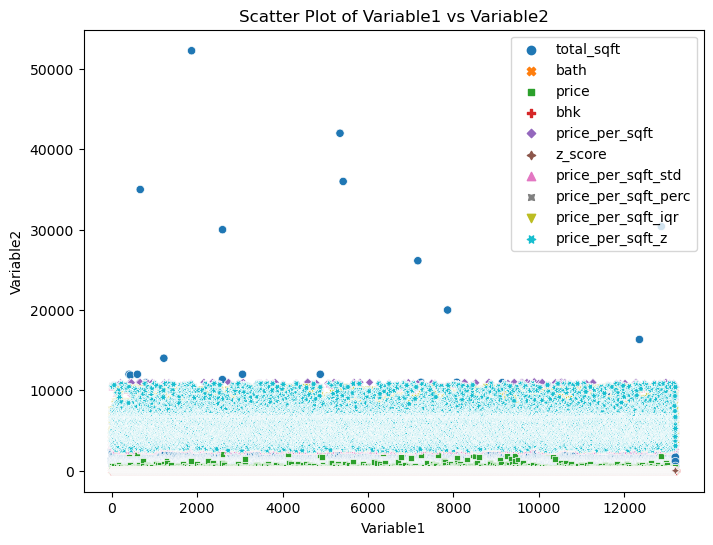

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numeric_df)
plt.title('Scatter Plot of Variable1 vs Variable2')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.show()